# By Adrian Scholand (15.04.2023)

# Titel of the Experiment

In [22]:
######################################## Import Packeges ########################################
import os                                                   #used to access folders (os = operating systhem)
import numpy as np                                          #used to load Data, np.array(), calculations with arrays are often simpler than with lists
import matplotlib.pyplot as plt                             #Plots and grafics
from kafe2 import XYContainer, Fit, Plot, ContoursProfiler  #calculate linear Fits
import math                                                 #e-Function, Logarithm, etc.
from math import log10 , floor                              #import some explicid funktions to write the shorter version of them
import tabulate as tabulate                                 #displying Data better
import pandas as pd                                         #useful to export data into Tabels including Excel-files
import uncertainties                                        #error-calculations with Tupels        

######################################## Directory where the Data-files are ########################################
directory = r"C:\Users\adria\OneDrive\Universitaet\Praktika_Beispielversuch\New_Experiment" #Directory r"...", for Windows filepaths

#################### set Directory and print it ####################
os.chdir(directory)                                         #goes to the specified Directory
directory_path = os.getcwd()                                #current Diectory
folder_name = os.path.basename(directory_path)              #current folder
print("My current directory is : " + directory_path)
print("My directory name is : " + folder_name)

######################################## Import additional Packages that are in the Folder ########################################
import latex_table as tab                                  #needs the Python-file for LaTex-Tabels made by Oliver Cordes. It has to be in the same folder
from Adrians_functions import *                            #needs the Python-file with my function (for rounding, etc.). It has to be in the same folder

My current directory is : C:\Users\adria\OneDrive\Universitaet\Praktika_Beispielversuch\New_Experiment
My directory name is : New_Experiment


# Subtask

In [23]:
######################################## Load Data ########################################
print(f'{" Load Data ":#^100}')
#Only works for 2-Dimensional Tables. 

Messdaten = "Data.txt"        #filename
        
data = np.loadtxt(Messdaten)  #load Data and print it
print(data) 

#load columns of the data
column1 = data[:,0]           #1.column
column2 = data[:,1]           #2.column
column3 = data[:,2]           #3.column
#print("Spalte 1:", column1)

#load lines of the data
line1 = data[0]               #1.line
line2 = data[1]               #2.line
line3 = data[2]               #3.line
#print("Zeile 1:", line1)

N=len(column1)                #number of Datapoints
print("N:", N)

############################################ Load Data #############################################
[[-90.      9.703   9.163]
 [-80.      9.694   9.276]
 [-70.      9.348   9.062]
 [-60.      9.603   8.322]
 [-50.      8.603   7.355]
 [-40.      6.153   6.125]
 [-30.      4.74    4.775]
 [-20.      3.461   3.461]
 [-10.      2.362   2.35 ]
 [  0.      1.758   1.738]
 [ 10.      1.618   1.612]
 [ 20.      2.006   1.989]
 [ 30.      2.847   2.863]
 [ 40.      3.959   4.018]
 [ 50.      5.321   5.305]
 [ 60.      6.692   6.701]
 [ 70.      9.062   7.854]
 [ 80.      8.576   8.664]
 [ 90.      9.087   9.178]]
N: 19


In [24]:
######################################## create LaTex-Tabels ########################################
print(f'{" LaTex-Tabelle ":#^100}')

#print("Type of data:", type(data))
#print("Dimension of data:", data.ndim)

k = 4 #number of significant digits to round to
column1_rounded = cutpointzerolist(column1)     #this column does not need to be rounded, but the .0 floats gets cut off
column2_rounded = round_list(column2, k)
column3_rounded = round_list(column3, k)

table = tab.LatexTable([column1_rounded, column2_rounded, column3_rounded],header=["Analysator-Winkel $\phi$", "$U$ in $V$ (Polarisator auf -90$^{\circ}$)", "$U$ in $V$ (Polarisator auf +90$^{\circ}$)"]) #calls LaTex-function by Oliver Cordes
print(table)

########################################## LaTex-Tabelle ###########################################
\begin{tabular}{ccc}
Analysator-Winkel $\phi$ & $U$ in $V$ (Polarisator auf -90$^{\circ}$) & $U$ in $V$ (Polarisator auf +90$^{\circ}$) \\ 
\hline
-90 & 9.703 & 9.163 \\ 
-80 & 9.694 & 9.276 \\ 
-70 & 9.348 & 9.062 \\ 
-60 & 9.603 & 8.322 \\ 
-50 & 8.603 & 7.355 \\ 
-40 & 6.153 & 6.125 \\ 
-30 & 4.74 & 4.775 \\ 
-20 & 3.461 & 3.461 \\ 
-10 & 2.362 & 2.35 \\ 
0 & 1.758 & 1.738 \\ 
10 & 1.618 & 1.612 \\ 
20 & 2.006 & 1.989 \\ 
30 & 2.847 & 2.863 \\ 
40 & 3.959 & 4.018 \\ 
50 & 5.321 & 5.305 \\ 
60 & 6.692 & 6.701 \\ 
70 & 9.062 & 7.854 \\ 
80 & 8.576 & 8.664 \\ 
90 & 9.087 & 9.178 \\ 
\end{tabular} 



In [25]:
######################################## calculations ########################################
Drucken_Wert = True
Drucken_Fehler = True

#################### measured values ####################
print(f'{" measured values ":#^100}')


#################### measured errors ####################
print("\n" + f'{" measured errors ":#^100}', sep="")


#################### calculated values ####################
print("\n" + f'{" calculated values ":#^100}', sep="")


#################### calculated errors ####################
print("\n" + f'{" calculated errors ":#^100}', sep="")


######################################### measured values ##########################################

######################################### measured errors ##########################################

######################################## calculated values #########################################

######################################## calculated errors #########################################


# Example Data

In [26]:
#################### Example-Data (by CHAT-GPT) ####################

np.random.seed(41)                                              #Set seed for reproducibility
x_data = np.arange(0, 10.5, 0.5)                                #Generate x data from 0 to 10 with spacing of 0.5
y_data = 2 * x_data + 3 + np.random.normal(0, 1, len(x_data))   #Generate y data with some random noise
x_err = np.abs(np.random.normal(0, 0.1, len(x_data)))           #Generate x and y errors with some random noise
y_err = np.abs(np.random.normal(0, 0.5, len(y_data)))           #Generate x and y errors with some random noise

# Scatterplot

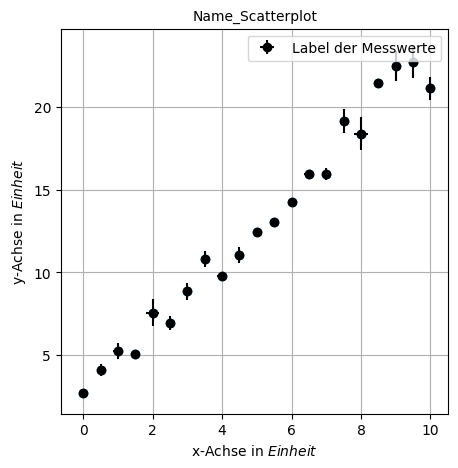

In [27]:
######################################## Scatterplot ########################################
name = "Name_Scatterplot" #set name of the Plot (titel and filename)

#################### Werte festlegen ####################
Farbe_plot1 = "black"                   #or for rgb-values: (r/255, g/255, b/255) #convert to values between 0 and 1
label_plot1 = r'Label der Messwerte'    #r'' String to render LaTex-Code

x_1 = x_data
y_1 = y_data
x_1_err = x_err
y_1_err = y_err

#################### set Labels ####################
xlabel = r'x-Achse in $Einheit$' #label of x-axis
ylabel = r'y-Achse in $Einheit$' #label of y-axis

######################################## actual Plot ########################################
#from kafe2 import XYContainer, Fit, Plot
#import matplotlib.pyplot as plt
#import numpy as np

#################### set font sizes ####################
plt.rc ('font', size = 10)              #sets standard font size
plt.rc ('axes', titlesize = 10)         #font size of titel
plt.rc ('axes', labelsize = 10)         #font size of axis labels
plt.rc ('xtick', labelsize = 10)        #font size of x-axis ticks
plt.rc ('ytick', labelsize = 10)        #font size of y-axis ticks
plt.rc ('legend', fontsize = 10)        #font size of legend

plt.figure(figsize = (5,5))             #size and aspectratio of picture
plt.xlabel(xlabel)                      #x-axis label
plt.ylabel(ylabel)                      #y-axis label
plt.title(name)                         #sets titel of the plot

#################### actual plot ####################

plt.scatter(x_1,y_1)                                    #datapoints #can be ignored if errorbars are plotted instead
plt.errorbar(x_1, y_1, xerr = x_1_err, yerr = y_1_err,  #errorbars
             fmt = "o",                                 #symbol of the marker: point = "." , circle = "o" cross = "x"
             color = Farbe_plot1,                       #color: red = "r" , black = "black" , for rgb-values: (r/255, g/255, b/255)
             label = label_plot1)                       #label is set in a string in a variable above

plt.grid()                                              #grid
plt.legend()                                            #Legend

#plt.tick_params(axis = "x", labelrotation = 30)        #rotate axis-ticks by 30°
plt.show                                                #show Plot
plt.savefig(f'{name+".jpg"}', dpi = 300)                #save Plot as jpg-file

# Linear Fit

######################################### Fit done by Hand #########################################
Anzahl der Wertepaare N: 21
Steigung m: 2.1993114310312922
y-Achsenabschnitt n: 1.7698819664684766
Varianz auf m $V[m]$: 0.00020671949997454233
Varianz auf n V[n]: 0.0021164055947574673
Kovarianz von m und n Vmn: -0.0005125857040273534
Wir erhalten die Güte als:  4.631481878184722

####################################### actual Fit and Plot ########################################


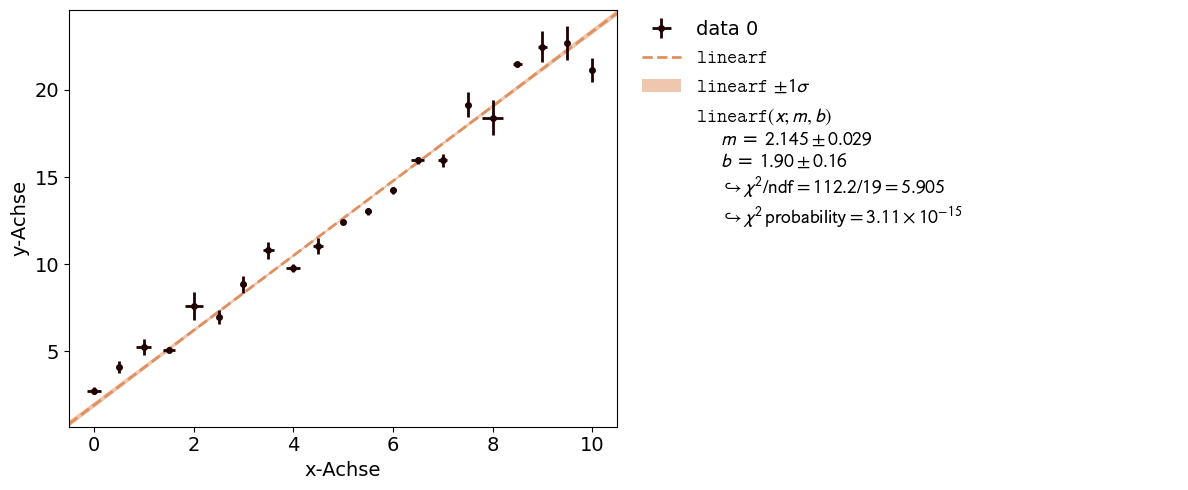

[[ 0.00083877 -0.00415601]
 [-0.00415601  0.02459269]]


In [28]:
######################################## Linear Fit ########################################
name = "name_Fit"

#################### Set Data ####################
x_data =  x_data
y_data = y_data
x_err = x_err
y_err = y_err

#################### set Labels ####################
xlabel = r'x-Achse' #label of x-axis
ylabel = r'y-Achse' #label of y-axis

######################################## Fit done by Hand ########################################
print(f'{" Fit done by Hand ":#^100}')

N = len(x_data)
print("Anzahl der Wertepaare N:" , N) #N = number of Datapoints

#################### Bildung der Varianzgewichteten Mittelwerte z ∈ {x, y, xy, x^2} ####################
sumyerr  = sum(1/(y_err)**2)
#print("Nenner der Mittelwerte:", sumyerr)
xdivyerr = sum(x_data/(y_err)**2)
#print("Zähler des x-Mittelwert:", xdivyerr)
ydivyerr = sum(y_data/(y_err)**2)
#print("Zähler des y-Mittelwert:", ydivyerr)
x2divyerr = sum((x_data**2)/(y_err)**2)
#print("Zähler des x^2-Mittelwert:", x2divyerr)
xydivyerr = sum((x_data*y_data)/(y_err)**2)
#print("Zähler des xy-Mittelwert:", xydivyerr)

#################### Bildung der Varianzgewichteten Mittelwerte ####################
xMittel = xdivyerr/sumyerr
#print("varianzgewichteter Mittelwert von X:", xMittel)
yMittel = ydivyerr/sumyerr
#print("varianzgewichteter Mittelwert von Y:", yMittel)
x2Mittel = x2divyerr/sumyerr
#print("Mittelwert von X^2:", x2Mittel)
xyMittel = xydivyerr/sumyerr
#print("Mittelwert von XY:", xyMittel)

#################### Berechnung von m und n ####################
m_fit = (xyMittel-(xMittel*yMittel))/(x2Mittel-(xMittel)**2) #Steigung m
print("Steigung m:", m_fit)
n_fit = yMittel - m_fit*xMittel #Achsenabschnitt n
print("y-Achsenabschnitt n:", n_fit)

#################### Berechnung von den Varianzen ####################
sigmayMittel = N/sumyerr #Varianzgewichtete Standardabweichung Sigmay
#print("varianzgemittelte Standardabweichung Sigmay: ", sigmayMittel)
Vm = sigmayMittel/(16*(x2Mittel-(xMittel)**2)) #Varianz der Steigung
print(f"Varianz auf m $V[m]$:", Vm)
Vn = x2Mittel*Vm #Varianz des Achsenabschnitt
print("Varianz auf n V[n]:", Vn)
Vmn = -Vm * xMittel #Kovarianz von m und n
print("Kovarianz von m und n Vmn:", Vmn)

#Berechnung der Güte:
xi2array = (y_data-m_fit*x_data-n_fit)**2/y_err #
xi2 = sum(xi2array)
#print("xi^2-Wert des Fits: ",xi2)
güte = xi2/(14-2) #Güte
print("Wir erhalten die Güte als: ", güte)

######################################## actual Fit and Plot ########################################
print("\n" + f'{" actual Fit and Plot ":#^100}', sep="")
#from kafe2 import XYContainer, Fit, Plot
#import matplotlib.pyplot as plt
#import numpy as np

def linearf(x, m, b):# lineare Funktion aufstellen
    return m*x+b
def linfit(x_data, y_data, x_err, y_err): # funktion mit den daten als argumenten erstellen
    xy_data = XYContainer(x_data, y_data) # behälter für x und y erstellen
    xy_data.add_error(axis='x', err_val=x_err) # x-Fehlerbalken
    xy_data.add_error(axis='y', err_val=y_err) # y-Fehlerbalken
    linear_fit = Fit(data=xy_data, model_function=linearf) # Objekt mit dem xy- Behälter und der linearen Funkrion erzeugen
    fit_results = linear_fit.do_fit() # ergebnisse bestimmen und später ausgeben lassen
    #linear_fit.report() #The report is very long
    plot = Plot(fit_objects=linear_fit) 
    plot.x_label = xlabel #Achsenbeschriftung x-Achse
    plot.y_label = ylabel #Achsenbeschriftung y-Achse   
    
    plot.plot()
    
    plt.savefig(f'{name+".jpg"}', dpi = 300) #Plot als jpg-Datei abspeichern
    plt.show() #Plot anzeigen
    return fit_results

# Ergebnisse in der Kovarianzmatrix ausgeben lassen
print(linfit(x_data, y_data, x_err, y_err)['parameter_cov_mat'])

# Plot of Linear Fit done by Hand


################################### Plot of the Fit done by Hand ###################################


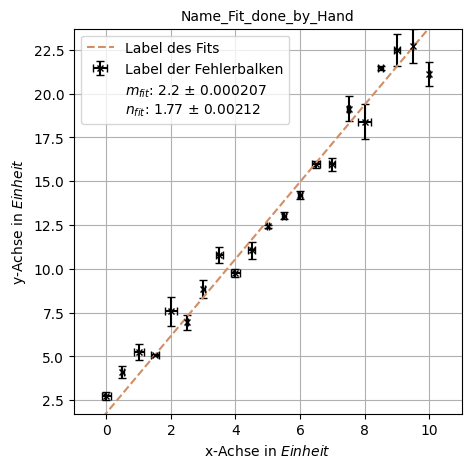

In [29]:
######################################## Plot of the Fit done by Hand ########################################
print("\n" + f'{" Plot of the Fit done by Hand ":#^100}', sep="")

name = "Name_Fit_done_by_Hand" #set the name of the plot (titel and filename)

#################### set Data for plot ####################
x_1 = x_data
y_1 = y_data
x_1_err = x_err
y_1_err = y_err

x_dash = np.linspace(min(x_data)-1,max(x_data)+1,2) #generates x-values for the line of best fit for plotting

#################### set labels ####################
xlabel = r'x-Achse in $Einheit$'        #label of x-axis
ylabel = r'y-Achse in $Einheit$'        #label of y-axis

label_plot1 = r'Label der Messwerte'    #label of datapoints
label_error = r'Label der Fehlerbalken' #label of errorbars
label_graph1 = r'Label des Fits'        #label of line of best fit

#extra text in legend       #fr"..." is used to render both LaTex and use variables     #"""..."""is used to be able to break up the String in multiple lines of code
legend_text = fr"""$m_{{fit}}$: {round_it(m_fit,3)} $\pm$ {round_it(Vm,3)}
$n_{{fit}}$: {round_it(n_fit,3)} $\pm$ {round_it(Vn,3)}"""

#################### set font sizes ####################
plt.rc ('font', size = 10)              #sets standard font size
plt.rc ('axes', titlesize = 10)         #font size of titel
plt.rc ('axes', labelsize = 10)         #font size of axis labels
plt.rc ('xtick', labelsize = 10)        #font size of x-axis ticks
plt.rc ('ytick', labelsize = 10)        #font size of y-axis ticks
plt.rc ('legend', fontsize = 10)        #font size of legend

plt.figure(figsize = (5,5))             #size and aspectratio of picture
plt.xlabel(xlabel)                      #x-axis label
plt.ylabel(ylabel)                      #y-axis label
plt.title(name)                         #sets titel of the plot

#################### actual plot ####################
"""
plt.scatter(x_1,y_1,                                    #datapoints #can be ignored if errorbars are plotted instead
            color = "black",                            #color: red = "r" , black = "black" , for rgb-values: (r/255, g/255, b/255)
            label = label_plot1)                        #label is set in a string in a variable above
"""
plt.errorbar(x_1, y_1, xerr = x_1_err, yerr = y_1_err,  #errorbars
            fmt = "x",                                  #symbol of the marker: point = "." , circle = "o" cross = "x"
            color = "black",                            #color: red = "r" , black = "black" , for rgb-values: (r/255, g/255, b/255)
            label = label_error,                        #label is set in a string in a variable above
            markersize = 5,                             #size of the marker
            capsize = 3,                                #size of the errorbar-caps (horizontal bars of the I and vertical bars of the H)
            markeredgewidth = 1)

plt.plot(x_dash,m_fit*x_dash+n_fit,                     #plots line of best fit
            linestyle = "--",                           #or: ".-" "." #style of the line "dotted" or "dashed" ...
            color = (211/255, 142/255, 99/255),         #color: red = "r" , black = "black" , for rgb-values: (r/255, g/255, b/255)
            label = label_graph1,)                      #label is set in a string in a variable above

plt.plot([], [], ' ', label = legend_text)              #Create empty plot with blank marker containing the extra text for the legend (label)

plt.xlim(min(x_data)-1, max(x_data)+1)                  #adjust the x-axis limits
plt.ylim(min(y_data)-1, max(y_data)+1)                  #adjust the y-axis limits

plt.margins(0)                                          #Remove the whitespace around the plot:
#plt.axis('equal')                                      #keeps aspectratio of x-axis and y-axis at 1:1
plt.grid()                                              #grid

handles, labels = plt.gca().get_legend_handles_labels() #get handles and labels
order = [0,2,1]                                         #specify order of items in legend
plt.legend([handles[idx] for idx in order],             #add legend to plot
           [labels[idx] for idx in order],
           loc=0)                                       #changes the location of the legend: best = 0 , 'upper left' , 'upper right'

#plt.tick_params(axis = "x", labelrotation = 30)        #rotate axis-ticks by 30°
plt.show                                                #show Plot
plt.savefig(f'{name+".jpg"}', dpi = 300)                #save Plot as jpg-file

# Plot of Linear Fit done by Hand with "1-Sigma Interval" it doesnt work right


######################## Plot of the Fit done by Hand with 1-Sigma-Interval ########################


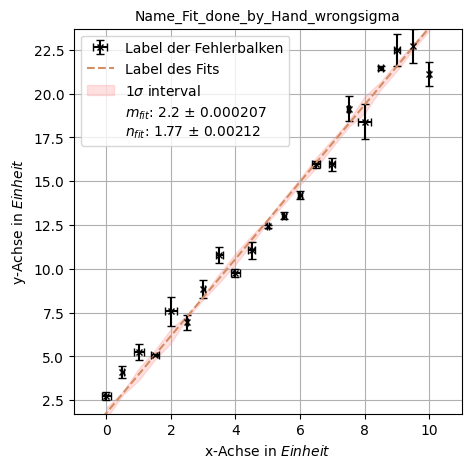

In [30]:
######################################## Plot of the Fit done by Hand with "1-Sigma Interval" ########################################
print("\n" + f'{" Plot of the Fit done by Hand with 1-Sigma-Interval ":#^100}', sep="")

name = "Name_Fit_done_by_Hand_wrongsigma" #set the name of the plot (titel and filename)

#################### set Data for plot ####################
x_1 = x_data
y_1 = y_data
x_1_err = x_err
y_1_err = y_err

x_dash = np.linspace(min(x_data)-1,max(x_data)+1,2) #generates x-values for the line of best fit for plotting

#################### set labels ####################
xlabel = r'x-Achse in $Einheit$'        #label of x-axis
ylabel = r'y-Achse in $Einheit$'        #label of y-axis

label_plot1 = r'Label der Messwerte'    #label of datapoints
label_error = r'Label der Fehlerbalken' #label of errorbars
label_graph1 = r'Label des Fits'        #label of line of best fit

#extra text in legend       #fr"..." is used to render both LaTex and use variables     #"""..."""is used to be able to break up the String in multiple lines of code
legend_text = fr"""$m_{{fit}}$: {round_it(m_fit,3)} $\pm$ {round_it(Vm,3)}
$n_{{fit}}$: {round_it(n_fit,3)} $\pm$ {round_it(Vn,3)}"""

#################### 1-Sigma-Interval ####################
y_fit = m_fit*x_data + n_fit
y_sigma = np.sqrt(Vm * x_data ** 2 + Vn + (m_fit * x_err) ** 2)
y_upper = y_fit + y_sigma
y_lower = y_fit - y_sigma

#################### set font sizes ####################
plt.rc ('font', size = 10)              #sets standard font size
plt.rc ('axes', titlesize = 10)         #font size of titel
plt.rc ('axes', labelsize = 10)         #font size of axis labels
plt.rc ('xtick', labelsize = 10)        #font size of x-axis ticks
plt.rc ('ytick', labelsize = 10)        #font size of y-axis ticks
plt.rc ('legend', fontsize = 10)        #font size of legend

plt.figure(figsize = (5,5))             #size and aspectratio of picture
plt.xlabel(xlabel)                      #x-axis label
plt.ylabel(ylabel)                      #y-axis label
plt.title(name)                         #sets titel of the plot

#################### actual plot ####################
"""
plt.scatter(x_1,y_1,                                    #datapoints #can be ignored if errorbars are plotted instead
            color = "black",                            #color: red = "r" , black = "black" , for rgb-values: (r/255, g/255, b/255)
            label = label_plot1)                        #label is set in a string in a variable above
"""
plt.errorbar(x_1, y_1, xerr = x_1_err, yerr = y_1_err,  #errorbars
            fmt = "x",                                  #symbol of the marker: point = "." , circle = "o" cross = "x"
            color = "black",                            #color: red = "r" , black = "black" , for rgb-values: (r/255, g/255, b/255)
            label = label_error,                        #label is set in a string in a variable above
            markersize = 5,                             #size of the marker
            capsize = 3,                                #size of the errorbar-caps (horizontal bars of the I and vertical bars of the H)
            markeredgewidth = 1)

plt.plot(x_dash,m_fit*x_dash+n_fit,                     #plots line of best fit
            linestyle = "--",                           #or: ".-" "." #style of the line "dotted" or "dashed" ...
            color = (211/255, 142/255, 99/255),         #color: red = "r" , black = "black" , for rgb-values: (r/255, g/255, b/255)
            label = label_graph1,)                      #label is set in a string in a variable above

plt.fill_between(x_data, y_upper, y_lower, alpha=0.3, color=(1.0, 0.6, 0.6), label=r'1$\sigma$ interval')

plt.plot([], [], ' ', label = legend_text)              #Create empty plot with blank marker containing the extra text for the legend (label)

plt.xlim(min(x_data)-1, max(x_data)+1)                  #adjust the x-axis limits
plt.ylim(min(y_data)-1, max(y_data)+1)                  #adjust the y-axis limits

plt.margins(0)                                          #Remove the whitespace around the plot:
#plt.axis('equal')                                      #keeps aspectratio of x-axis and y-axis at 1:1
plt.grid()                                              #grid

handles, labels = plt.gca().get_legend_handles_labels() #get handles and labels
order = [3,0,1,2]                                         #specify order of items in legend
plt.legend([handles[idx] for idx in order],             #add legend to plot
           [labels[idx] for idx in order],
           loc=0)                                       #changes the location of the legend: best = 0 , 'upper left' , 'upper right'

#plt.tick_params(axis = "x", labelrotation = 30)        #Rotiert die Achsenticks um 30°
plt.show                                                #Plot anzeigen
plt.savefig(f'{name+".jpg"}', dpi = 300)                #Plot als jpg-Datei abspeichern